In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import pandas as pd


# Seleccion de datos de entrenamiento y validacion del dataset 

In [57]:
#el dataset elegido es breast cancer wisconsin, tiene 30 entradas y salidas malignant=M=0, benignant=B=1
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)

normalized_df=(df-df.min())/(df.max()-df.min())

#print (normalized_df)
#print (data.target)


In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(normalized_df, data.target, test_size=0.33, random_state=42)

#print(x_train)
print(x_train.shape)
#print(y_train)
print(y_train.shape)
#print(x_test)
print(x_test.shape)
#print(y_test)
print(y_test.shape)

(381, 30)
(381,)
(188, 30)
(188,)


**codificacion de las salidas one hot**

In [59]:
#Definición de los arreglos que almacenarán los datos de entrenamiento
y_trainOneHot=np.zeros([381,2],dtype=np.float64)


for cont in range(381):
  if y_train[cont]==0:
    y_trainOneHot[cont,0] =1
    y_trainOneHot[cont,1] =0                    
  if y_train[cont]==1:
    y_trainOneHot[cont,0] =0
    y_trainOneHot[cont,1] =1  

n_samples=cont 
print(n_samples)
print(y_trainOneHot.shape)

y_testOneHot=np.zeros([188,2],dtype=np.float64)

for cont in range(188):
  if y_test[cont]==0:
    y_testOneHot[cont,0] =1
    y_testOneHot[cont,1] =0
                       
  if y_test[cont]==1:
    y_testOneHot[cont,0] =0
    y_testOneHot[cont,1] =1
  

n_samples=cont 
print(n_samples)
print(y_testOneHot.shape)

380
(381, 2)
187
(188, 2)


**Red neurnoal superficial**

In [60]:
model = tf.keras.models.Sequential([                              
  tf.keras.layers.Dense(50, activation=tf.nn.tanh,input_shape=(30,)),
  tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])
model.summary()

tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_trainOneHot, epochs=1000, verbose=0)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 102       
Total params: 1,652
Trainable params: 1,652
Non-trainable params: 0
_________________________________________________________________


# Matrix de confusion datos de entrenamiento red superficial

In [61]:
model.evaluate(x_train, y_trainOneHot)
outputTrain=model.predict(x_train)

Out_train=np.zeros([381,1],dtype=np.float64)
#Para la matriz de confusión se necesita la posición de la neurona que tuvo mayor #activación, esto determina la clase
for i in range(0,381):
    Out_train[i] = np.argmax(outputTrain[i,:])

#Nombres de las clases para la matriz de confusión    
class_names=['Malignant', 'Benignant']


12/12 [==============================] - 0s 1ms/step - loss: 0.0100 - accuracy: 0.9974


In [62]:
#Función que permite graficar la matriz de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print(" Matrix de confusion Normalizada ")
    else:
        print('Matrix de confusion No Normalizada')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Salida Deseada')
    plt.xlabel('Salida Estimada')

Matrix de confusion No Normalizada
[[144   1]
 [  0 236]]
 Matrix de confusion Normalizada 
[[0.99 0.01]
 [0.   1.  ]]


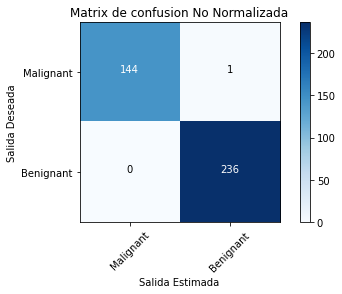

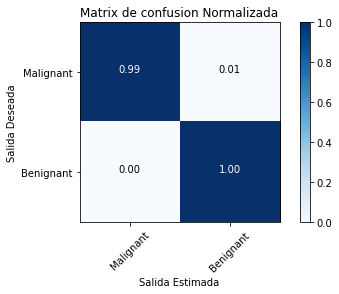

In [64]:
# Calculo de la matriz de confusión
cnf_matrix = confusion_matrix(y_train, Out_train)
np.set_printoptions(precision=2)

# Graficación de la matriz de confusión no normalizada 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusion No Normalizada')

# Graficación de la matriz de confusión normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusion Normalizada')

plt.show()

**matrix de confusion con datos de validacion red superficial**

In [65]:
model.evaluate(x_test, y_testOneHot)
outputTest=model.predict(x_test)

Out_CM=np.zeros([188,1],dtype=np.float64)
#Para la matriz de confusión se necesita la posición de la neurona que tuvo mayor #activación, esto determina la clase
for i in range(0,188):
    Out_CM[i] = np.argmax(outputTest[i,:])

#Nombres de las clases para la matriz de confusión    
class_names=['Malignant', 'Benignant']

6/6 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9681


In [66]:
#Función que permite graficar la matriz de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print(" Matrix de confusion Normalizada ")
    else:
        print('Matrix de confusion No Normalizada')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Salida Deseada')
    plt.xlabel('Salida Estimada')

Matrix de confusion No Normalizada
[[ 65   2]
 [  4 117]]
 Matrix de confusion Normalizada 
[[0.97 0.03]
 [0.03 0.97]]


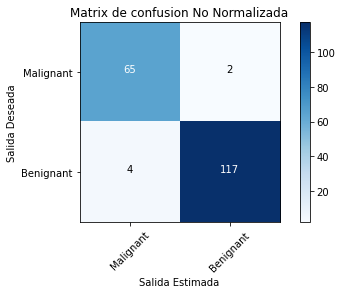

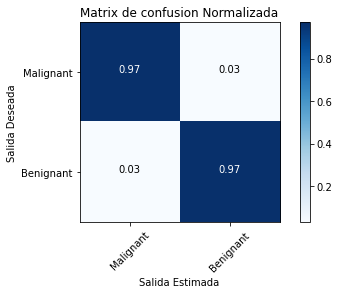

In [67]:
# Calculo de la matriz de confusión
cnf_matrix = confusion_matrix(y_test, Out_CM)
np.set_printoptions(precision=2)

# Graficación de la matriz de confusión no normalizada 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusion No Normalizada')

# Graficación de la matriz de confusión normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusion Normalizada')

plt.show()

# definicion de red profunda

In [68]:
modelP = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(30,)),
  tf.keras.layers.Dense(1000, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

modelP.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

modelP.fit(x_train, y_train, epochs=100, verbose=0)



In [69]:
modelP.evaluate(x_test, y_test)
modelP.predict(x_test)
#print(modelP.predict(x_test))
#print(y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9840


array([[1.04e-01, 8.96e-01],
       [1.00e+00, 5.33e-07],
       [1.00e+00, 9.24e-05],
       [8.90e-06, 1.00e+00],
       [7.90e-06, 1.00e+00],
       [1.00e+00, 4.74e-13],
       [1.00e+00, 3.11e-11],
       [9.69e-01, 3.08e-02],
       [5.44e-01, 4.56e-01],
       [1.61e-04, 1.00e+00],
       [2.77e-02, 9.72e-01],
       [9.98e-01, 2.05e-03],
       [8.35e-04, 9.99e-01],
       [9.19e-01, 8.09e-02],
       [1.19e-03, 9.99e-01],
       [1.00e+00, 8.77e-05],
       [1.62e-04, 1.00e+00],
       [6.73e-06, 1.00e+00],
       [8.52e-07, 1.00e+00],
       [1.00e+00, 2.89e-08],
       [3.47e-02, 9.65e-01],
       [3.28e-03, 9.97e-01],
       [1.00e+00, 2.69e-11],
       [8.88e-05, 1.00e+00],
       [3.28e-04, 1.00e+00],
       [4.95e-05, 1.00e+00],
       [2.36e-04, 1.00e+00],
       [3.96e-03, 9.96e-01],
       [2.20e-04, 1.00e+00],
       [1.00e+00, 2.34e-07],
       [1.01e-04, 1.00e+00],
       [4.05e-05, 1.00e+00],
       [1.90e-03, 9.98e-01],
       [5.10e-04, 9.99e-01],
       [2.57e-

# Matrix de confusion datos de entrenamiento red profunda


12/12 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9921
Matrix de confusion No Normalizada
[[142   3]
 [  0 236]]
 Matrix de confusion Normalizada 
[[0.98 0.02]
 [0.   1.  ]]


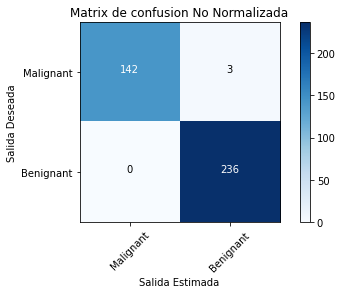

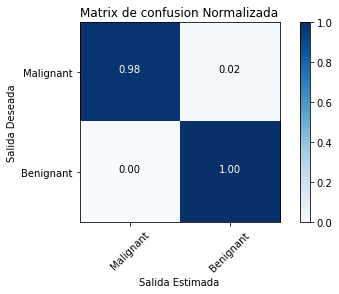

In [70]:
modelP.evaluate(x_train, y_train)
en_Output=modelP.predict(x_train)

Out_test_CM=np.zeros([381,1],dtype=np.float64)
for h in range(0,381):
    Out_test_CM[h] = np.argmax(en_Output[h,:])

    #Calculo de la matriz de confusión
cnf_matrix = confusion_matrix(y_train, Out_test_CM)
np.set_printoptions(precision=2)

# Graficación de la matriz de confusión no normalizada 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusion No Normalizada')

# Graficación de la matriz de confusión normalizada 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusion Normalizada')

plt.show()

**matrix de confusion red profunda con datos de validacion**

In [71]:
modelP.evaluate(x_test, y_test)
curr_Output=modelP.predict(x_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9840


Matrix de confusion No Normalizada
[[ 65   2]
 [  1 120]]
 Matrix de confusion Normalizada 
[[0.97 0.03]
 [0.01 0.99]]


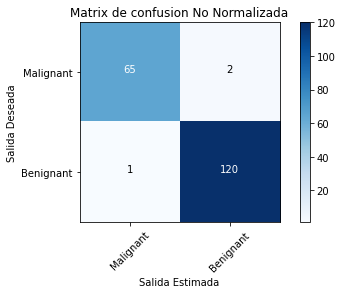

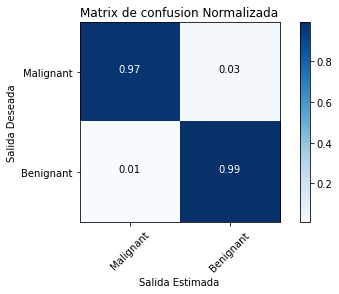

In [72]:
Out_test_C=np.zeros([188,1],dtype=np.float64)
for ii in range(0,188):
    Out_test_C[ii] = np.argmax(curr_Output[ii,:])

    #Calculo de la matriz de confusión
cnf_matrix = confusion_matrix(y_test, Out_test_C)
np.set_printoptions(precision=2)

# Graficación de la matriz de confusión no normalizada 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matrix de confusion No Normalizada')

# Graficación de la matriz de confusión normalizada 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matrix de confusion Normalizada')

plt.show()